# Sieć ograniczenia

In [1]:
from matplotlib import pyplot as plt

from main import run_genetic_algorithm, test_genetic_algorithm, plot_results, run_differential_algorithm, test_differential_algorithm
from data_reader import parse_sndlib_file
from itertools import product


with open("data.txt", "r") as file:
    file_content = file.read()
data = parse_sndlib_file(file_content)

## Algorytm genetyczny:

Poniżej przedstawiono wyniki uruchomienia algorytmu genetycznego dla 50 generacji.\
Algorytm dla domyślnych parametrów znajduje minimum lokalne (8250) około 30 generacji.

In [5]:
result= run_genetic_algorithm(
        data,
        n_generations=50,
        cross_aggregating=True,
        population_size=150,
        tournament_size=2,
        survivors=10,
        severity_of_mutation=0.8,
        normal_mutation_chance=0.9,
        mutation_aggregation_chance=0.0,
        switch_mutation_chance=0.0,
        num_of_init_chunks=50
    )
print(f"Minimum: {min(result)}")

plt.figure(figsize=(10, 5))
plt.plot(result)
plt.xlabel('Generation')
plt.ylabel('Cost')
plt.yscale("log")
plt.title('genetic algorithm')
plt.show()

Generation 0:
	Min: 190625, Max: 200625, Avg: 200491.66666666666
Generation 1:
	Min: 190625, Max: 200625, Avg: 199358.33333333334
Generation 2:
	Min: 190625, Max: 200625, Avg: 195025.0
Generation 3:
	Min: 190625, Max: 200625, Avg: 191558.33333333334
Generation 4:
	Min: 179710, Max: 190625, Avg: 190333.5
Generation 5:
	Min: 179125, Max: 190625, Avg: 187195.43333333332
Generation 6:
	Min: 159125, Max: 190625, Avg: 176764.43333333332
Generation 7:
	Min: 109125, Max: 179710, Avg: 155276.14


KeyboardInterrupt: 

### Eksperymenty
Następnie przeprowadzono eksperymenty z różnymi parametrami algorytmu genetycznego.\
Algorytm został wywołany 10 razy dla każdej kombinacji parametrów.

#### Rozmiar populacji
Algorytm został uruchomiony dla rozmiarów populacji: 100, 150 i 200.

In [6]:
population_sizes = [100, 150, 200]
population_medians, population_stds = [], []
for population_size in population_sizes:
    medians, stds  = test_genetic_algorithm(data, population_size=population_size)
    population_medians.append(medians)
    population_stds.append(stds)

Generation 0:
	Min: 200625, Max: 200625, Avg: 200625.0
Generation 1:
	Min: 200625, Max: 200625, Avg: 200625.0
Generation 2:
	Min: 200625, Max: 200625, Avg: 200625.0
Generation 3:
	Min: 190625, Max: 200625, Avg: 200525.0
Generation 4:
	Min: 190625, Max: 200625, Avg: 200225.0
Generation 5:
	Min: 190625, Max: 200625, Avg: 198925.0
Generation 6:
	Min: 190625, Max: 200625, Avg: 196325.0
Generation 7:
	Min: 190625, Max: 200625, Avg: 194425.0


KeyboardInterrupt: 

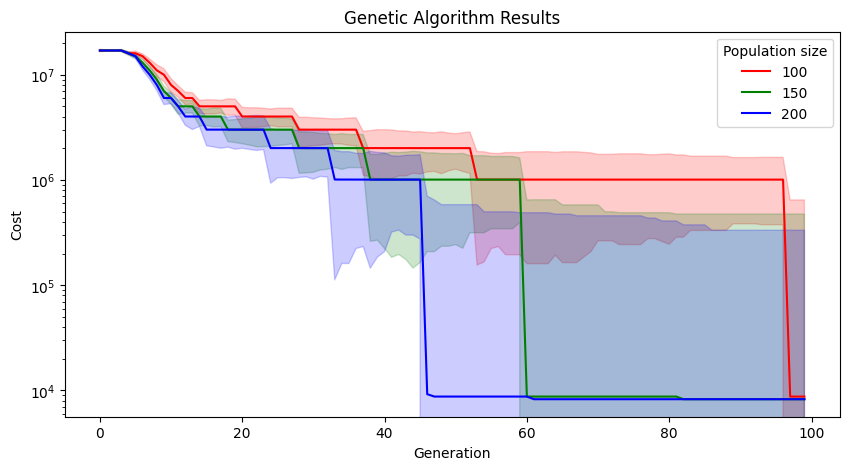

In [4]:
plot_results('Population size', population_sizes, population_medians, population_stds)

Na wykresie przedstawiono wyniki dla różnych rozmiarów populacji.\
Najlepiej wypadła populacja o rozmiarze 200. W tym przypadku algorytm znalazł minimum (8250) około 45 generacji.\
W przypadku rozmiaru równego 150, algorytm znalazł minimum lokalne (8250) około 60 generacji.\
Dla rozmiaru populacji 100, algorytm czasem znajdował minimum.

#### Rozmiar elity
Algorytm został uruchomiony dla rozmiarów elity: 10, 15 i 20.

In [2]:
surviors_sizes = [10, 15, 20]
survior_medians, surviors_std = [], []
for surviors in surviors_sizes:
    medians, stds  = test_genetic_algorithm(data, survivors=surviors)
    survior_medians.append(medians)
    surviors_std.append(stds)

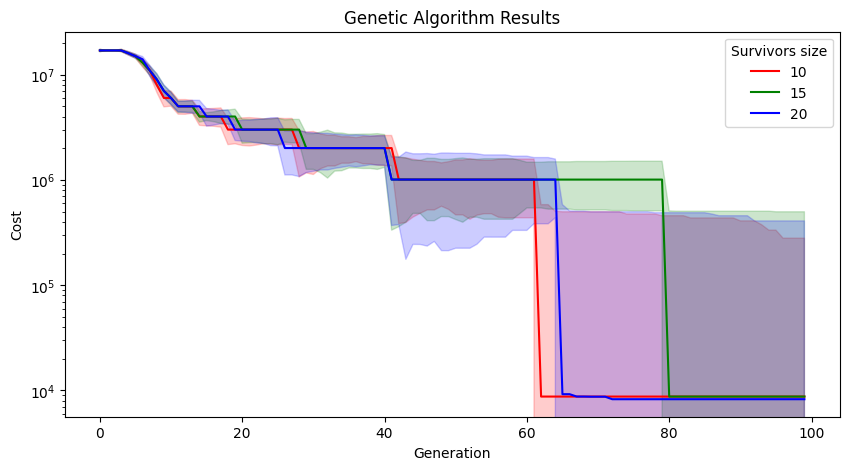

In [3]:
plot_results('Survivors size', surviors_sizes, survior_medians, surviors_std)

Na wykresie przedstawiono wyniki dla różnych rozmiarów elity.\
Najlepiej wypadły elita o rozmiarze 10 oraz 20. W tym przypadku algorytm znalazł minimum (8250) około 60 generacji.\
Dla rozmiaru elity 15, algorytm znalazł minimum dopiero w 80 generacji.

#### Mutacja
Algorytm został uruchomiony z różnymi mutacjami: normal, aggregation i switch.

In [5]:
mutations = ["normal", "aggregation", "switch"]
mutation_medians, mutation_std = [], []
for mutation in mutations:
    medians, stds  = test_genetic_algorithm(data, mutation_type=mutation)
    mutation_medians.append(medians)
    mutation_std.append(stds)

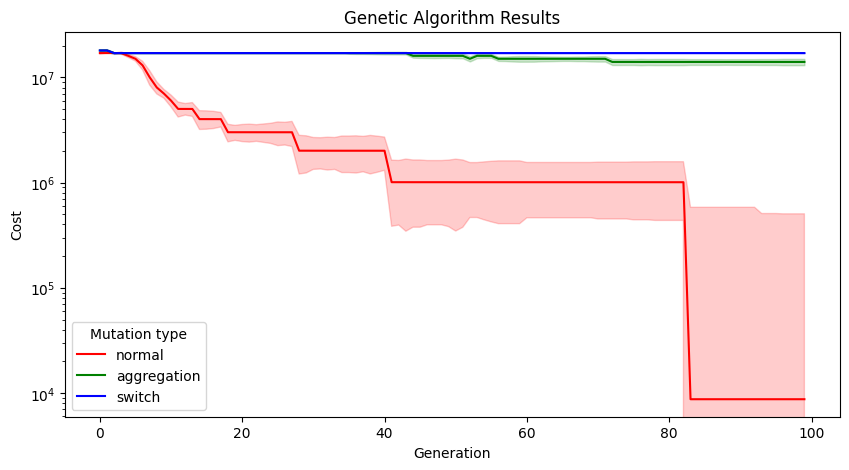

In [6]:
plot_results('Mutation type', mutations, mutation_medians, mutation_std)

Na wykresie przedstawiono wyniki dla różnych rodzajów mutacji.\
Najlepiej wypadła mutacja "normal". W tym przypadku algorytm znalazł minimum (8250) około 80 generacji.\
Dla mutacji "aggregation" i "switch" algorytm nie znalazł minimum.

#### Szansa mutacji
Algorytm został uruchomiony z różnymi szansami mutacji: 0.7, 0.8 i 0.9.

Na wykresie przedstawiono wyniki dla różnych wartości szansy mutacji.\
Najlepiej sprawdziła się szansa równa 0.9. W tym przypadku algorytm znalazł minimum (8250) około 60 generacji.\
Dla wartości 0.7, algorytm zachowywał się mniej przewidywalnie.
Algorytm znalazł minimum dopiero około 100 generacji dla szansy równej 0.8.\

#### Siła mutacji
Algorytm został uruchomiony z różnymi siłami mutacji: 0.7, 0.8 i 0.9.

In [12]:
severities = [0.7, 0.8, 0.9]
severity_medians, severity_std = [], []
for severity_of_mutation in severities:
    medians, stds  = test_genetic_algorithm(data, severity_of_mutation=severity_of_mutation)
    severity_medians.append(medians)
    severity_std.append(stds)

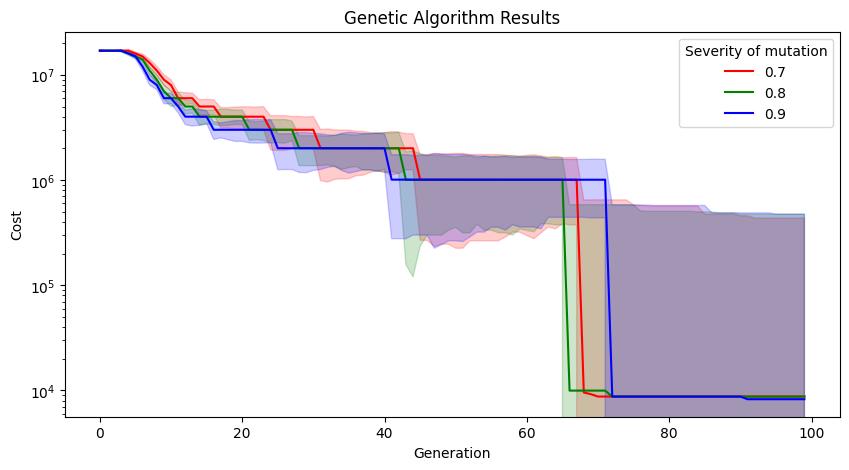

In [13]:
plot_results('Severity of mutation', severities, severity_medians, severity_std)

Na wykresie przedstawiono wyniki dla różnych sił mutacji.\
Najlepsza okazała się wartość 0.8. W tym przypadku algorytm znalazł minimum (8250) około 65 generacji.\
Dla siły równej 0.7, algorytm znadjdował minimum około 70 generacji.\
Algorytm około 75 generacji znalazł minimum dla wartości 0.1.

#### Krzyżowanie
Algorytm został uruchomiony z krzyżowaniem agregacyjnym i bez.

In [10]:
aggregate_medians, aggregate_std = [], []
for aggregate in [True, False]:
    medians, stds  = test_genetic_algorithm(data, cross_aggregating=aggregate)
    aggregate_medians.append(medians)
    aggregate_std.append(stds)

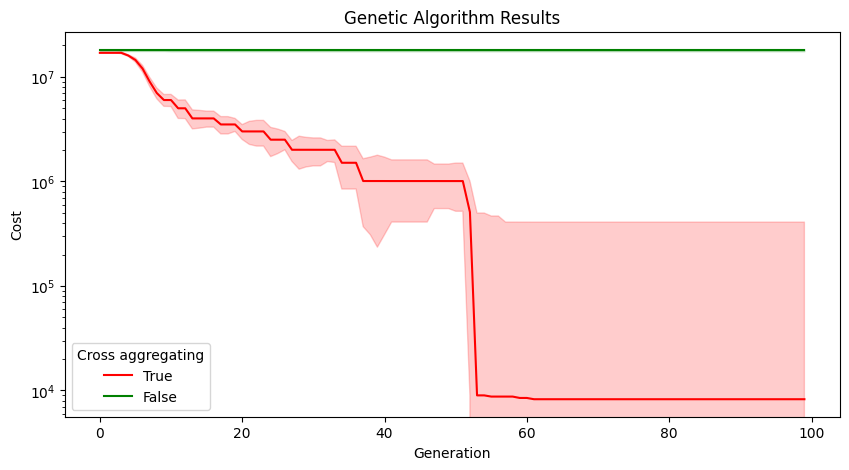

In [11]:
plot_results('Cross aggregating', [True, False], aggregate_medians, aggregate_std)

Na wykresie przedstawiono wyniki dla dwóch przypadków.\
W przypadku krzyżowania agregacyjnego, algorytm znalazł minimum (8250) około 50 generacji.\
Algorytm bez krzyżowania agregacyjnego nie znalazł minimum.

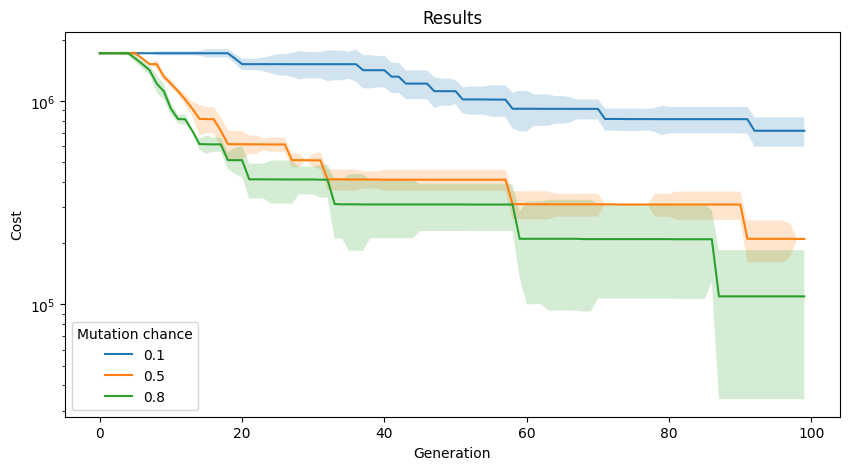

In [3]:
mutation_chances = [0.1, 0.5, 0.8]
chance_medians, chance_std = [], []
for mutation_chance in mutation_chances:
    medians, stds  = test_genetic_algorithm(data, mutation_chance=mutation_chance)
    chance_medians.append(medians)
    chance_std.append(stds)

plot_results('Mutation chance', mutation_chances, chance_medians, chance_std)

## Algorytm różnicowy:

Poniżej przedstawiono wyniki uruchomienia algorytmu różnicowego dla 250 generacji.\
Algorytm dla domyślnych parametrów znajduje minimum lokalne (8250) około 200 generacji.

Minimum: 1009534


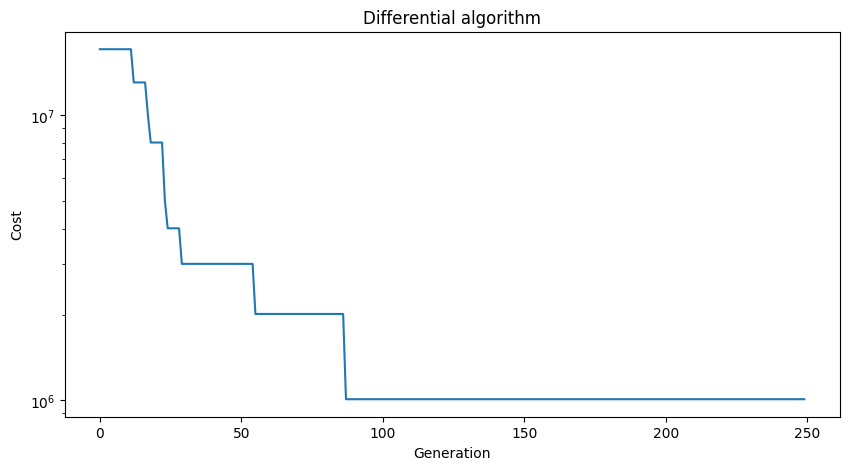

In [7]:
result = run_differential_algorithm(data)
print(f"Minimum: {min(result)}")

plt.figure(figsize=(10, 5))
plt.plot(result)
plt.xlabel('Generation')
plt.ylabel('Cost')
plt.yscale("log")
plt.title('Differential algorithm')
plt.show()

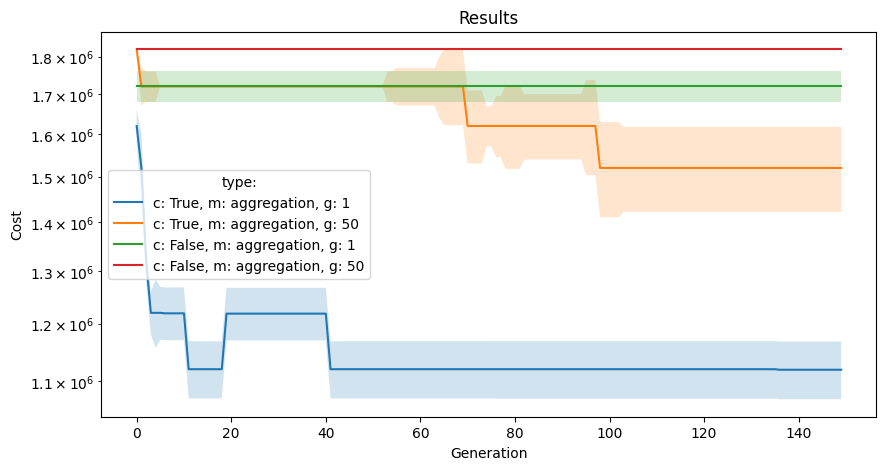

In [3]:
a_medians, a_std, a_labels = [], [], []

cross_aggr = [True, False]
mut_type = ["aggregation"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    medians, stds  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, mutation_chance=0.8)
    a_medians.append(medians)
    a_std.append(stds)

plot_results('type:', a_labels, a_medians, a_std)

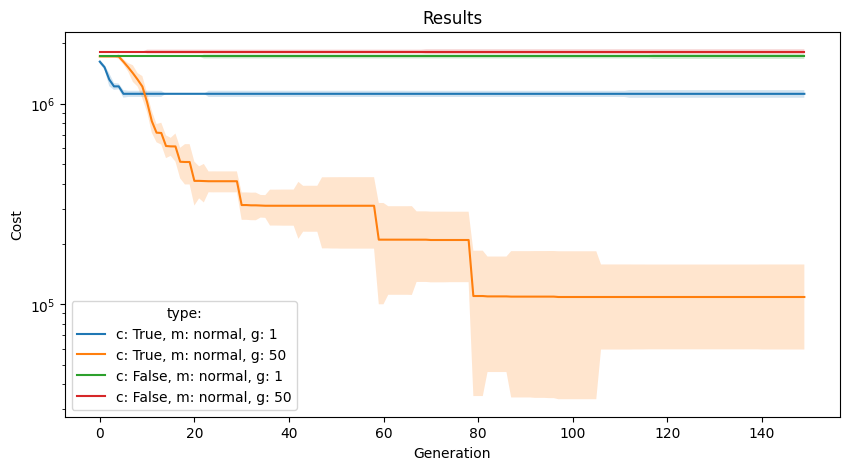

In [2]:
a_medians, a_std, a_labels = [], [], []

cross_aggr = [True, False]
mut_type = ["normal"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    medians, stds  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, mutation_chance=0.8)
    a_medians.append(medians)
    a_std.append(stds)

plot_results('type:', a_labels, a_medians, a_std)

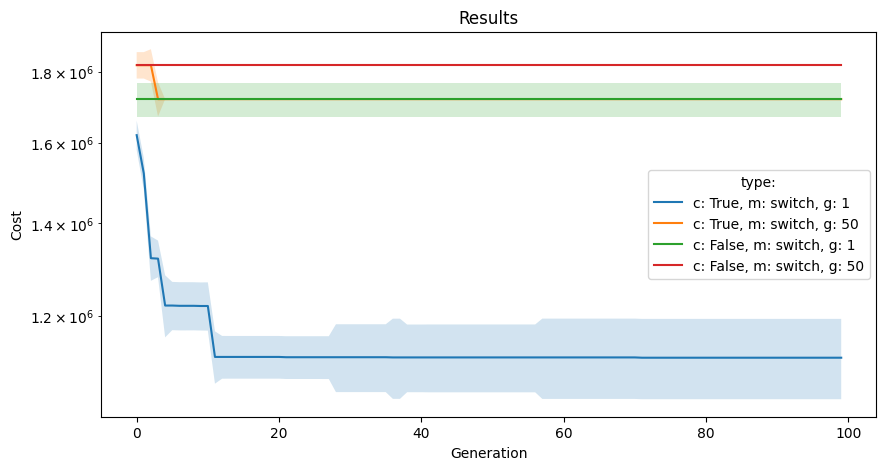

In [ ]:
a_medians, a_std, a_labels = [], [], []

cross_aggr = [True, False]
mut_type = ["switch"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    medians, stds  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, mutation_chance=0.8)
    a_medians.append(medians)
    a_std.append(stds)

plot_results('type:', a_labels, a_medians, a_std)

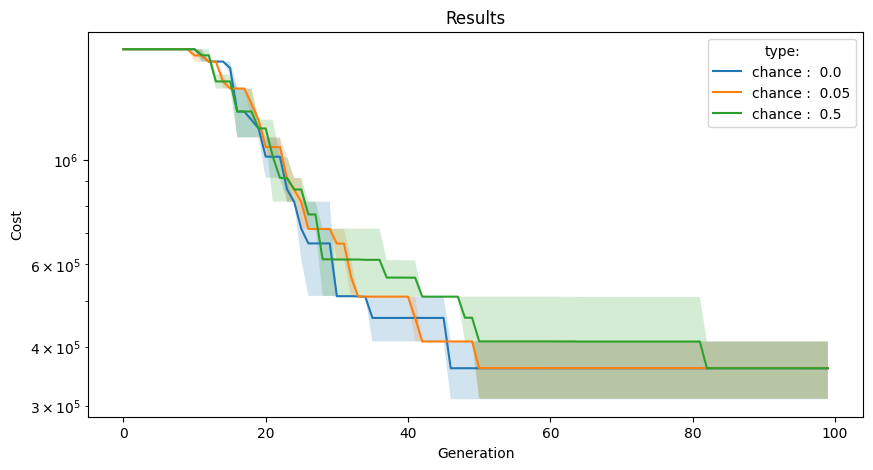

In [2]:
a_medians, a_std, a_labels = [], [], []

mut_aggr_chance = [0.0, 0.05, 0.5]

for chance in mut_aggr_chance:
    a_labels.append(f"chance :  {chance}")
    medians, stds  = test_differential_algorithm(data, smoothing_mutation_chance=chance)
    a_medians.append(medians)
    a_std.append(stds)

plot_results('type:', a_labels, a_medians, a_std)